# Grouped Bar Plots

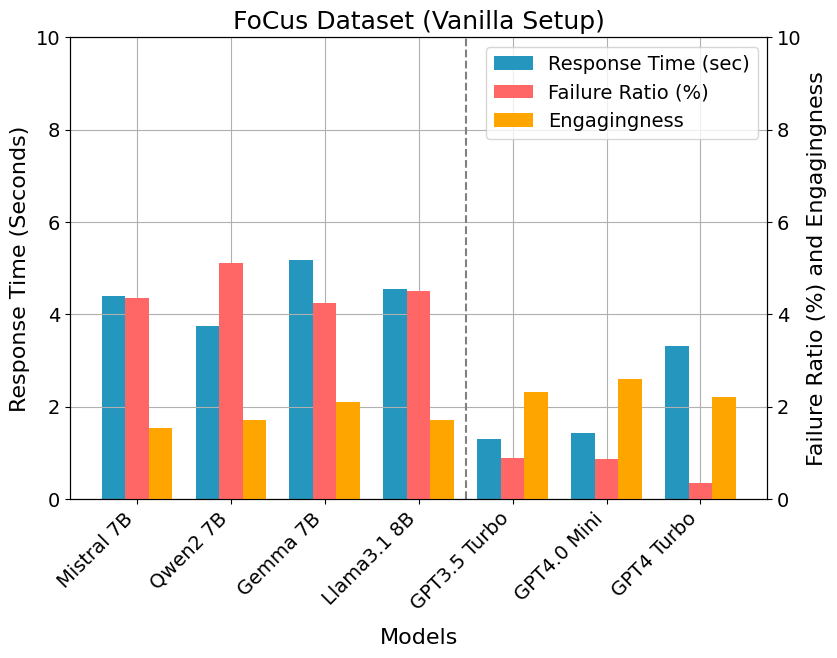

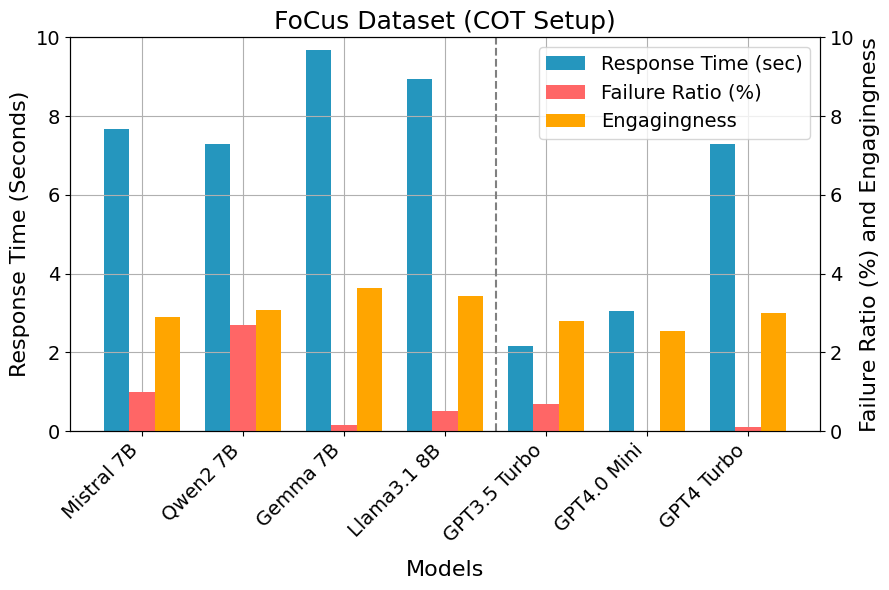

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for FoCus dataset (Vanilla and COT)
models = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'Llama3.1 8B', 'GPT3.5 Turbo', 'GPT4.0 Mini', 'GPT4 Turbo']
response_time_vanilla = [4.39, 3.74, 5.17, 4.54, 1.30, 1.43, 3.32]
failure_ratio_vanilla = [4.35, 5.1, 4.25, 4.5, 0.9, 0.86, 0.35]
engagingness_vanilla = [1.54, 1.72, 2.1, 1.71, 2.31, 2.61, 2.2]

response_time_cot = [7.67, 7.28, 9.68, 8.93, 2.16, 3.05, 7.29]
failure_ratio_cot = [1.0, 2.7, 0.15, 0.5, 0.7, 0, 0.1]
engagingness_cot = [2.89, 3.07, 3.63, 3.43, 2.8, 2.54, 3.0]

# Function to create a grouped bar chart
def plot_grouped_bar_chart(response_time, failure_ratio, engagingness, title, ax, y_max_time, y_max_ratio):
    bar_width = 0.25
    index = np.arange(len(models))
    
    # Define specific colors for each metric
    color_response_time = '#2596be'  # Blue shade for response time
    color_failure_ratio = '#ff6666'  # Red shade for failure ratio
    color_engagingness = '#FFA500'   # Orange for engagingness
    
    # Plot response time on primary y-axis
    p1 = ax.bar(index - bar_width, response_time, bar_width, color=color_response_time, label='Response Time (sec)')
    
    # Create a secondary y-axis for failure ratio and engagingness
    ax2 = ax.twinx()
    p2 = ax2.bar(index, failure_ratio, bar_width, color=color_failure_ratio, label='Failure Ratio (%)')
    p3 = ax2.bar(index + bar_width, engagingness, bar_width, color=color_engagingness, label='Engagingness')
    
    # Add labels, title, and formatting
    ax.set_xlabel('Models', fontsize=16, labelpad=10)  # Add vertical margin with labelpad
    ax.set_ylabel('Response Time (Seconds)', fontsize=16)
    ax2.set_ylabel('Failure Ratio (%) and Engagingness', fontsize=16)
    ax.set_title(title, fontsize=18)
    
    ax.set_xticks(index)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=14)
    
    # Adjust the y-axes limits
    ax.set_ylim(0, y_max_time)  # Set y-axis limit for response time
    ax2.set_ylim(0, y_max_ratio)  # Set y-axis limit for failure ratio and engagingness
    ax.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    
    # Add grid to the background
    ax.grid(True)
    
    # Add vertical dashed lines to visually separate open-source and GPT models
    ax.axvline(x=3.5, color='gray', linestyle='--', lw=1.5)  # Line separating open-source and GPT models
    
    # Combine handles and labels for legend
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    
    # Add the combined legend
    ax.legend(handles, labels, loc='upper right', fontsize=14)

# Create subplots for Vanilla and COT setup with adjusted plot dimensions
fig_vanilla, ax_vanilla = plt.subplots(figsize=(9, 6))  # Wider X-axis, shorter plot height
fig_cot, ax_cot = plt.subplots(figsize=(9, 6))

# Vanilla setup chart with y_max_time for response time and y_max_ratio for failure ratio
plot_grouped_bar_chart(response_time_vanilla, failure_ratio_vanilla, engagingness_vanilla,
                       'FoCus Dataset (Vanilla Setup)', ax_vanilla, y_max_time=10, y_max_ratio=10)

# COT setup chart with y_max_time for response time and y_max_ratio for failure ratio
plot_grouped_bar_chart(response_time_cot, failure_ratio_cot, engagingness_cot,
                       'FoCus Dataset (COT Setup)', ax_cot, y_max_time=10, y_max_ratio=10)

# Adjust layout and display the charts
plt.tight_layout()

fig_vanilla.savefig('Figures/focus_vanilla_setup_grouped_plus_scaled.pdf', bbox_inches='tight')
fig_vanilla.savefig('Figures/focus_vanilla_setup_grouped_plus_scaled.png', bbox_inches='tight', dpi=300)
fig_cot.savefig('Figures/focus_cot_setup_grouped_plus_scaled.pdf', bbox_inches='tight')
fig_cot.savefig('Figures/focus_cot_setup_grouped_plus_scaled.png', bbox_inches='tight', dpi=300)


plt.show()


# Rada Plots

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a radar chart
def create_radar_chart(data_list, labels, categories, colors, filename):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
       
    N = len(data_list[0]) - 1  # Subtract 1 because the data sets are closed by repeating the first value
    angles = np.linspace(0, 2 * np.pi, N + 1)

    # Plot each data set
    for idx, data in enumerate(data_list):
        ax.fill(angles, data, color=colors[idx], alpha=0.3, label=labels[idx])
        ax.plot(angles, data, color=colors[idx], linewidth=1.2)  # Reduced polygon border width

    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=17)

    # Set range for radar chart
    ax.set_rlabel_position(30)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="black", size=14)
    plt.ylim(0, 100)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.tight_layout()

    # Set title and save the figure
    plt.savefig("Figures/" + filename, format="pdf")
    plt.savefig("Figures/" + filename.replace('.pdf', '.png'), format="png", dpi=300)

    # Show the plot
    plt.show()


## 6 Categories

In [4]:
# Define the aspects to be plotted (excluding Response Time and Failure Ratio)
categories = ['Fluency', 'Diversity', 'Coherence', 'Persona Coverage', 'Groundedness', 'Persona Consistency']

#               Bert-f1, Dist-2, UE-Score, P-Dist, Nat-Ground, C Score

colors = ['orange', 'blue', 'green', 'brown']

In [5]:
# Data for open-source LLMs from the Vanilla setup on the FoCus dataset (scaled by 100)
data_mistral7b_vanilla = [0.48 * 100,   0.56 * 100,    0.21 * 100,     0.30 * 100,     0.45 * 100,      -0.23 * 100]
data_qwen2_7b_vanilla =  [0.42 * 100,   0.49 * 100,    0.17 * 100,     0.29 * 100,     0.43 * 100,      -0.31 * 100]
data_gemma_7b_vanilla =  [0.49 * 100,   0.56 * 100,    0.22 * 100,     0.39 * 100,     0.55 * 100,      -0.13 * 100]
data_llama13b_vanilla =  [0.47 * 100,   0.53 * 100,    0.17 * 100,     0.33 * 100,     0.42 * 100,      -0.22 * 100]

# Data for closed-source LLMs from the Vanilla setup on the FoCus dataset (scaled by 100)
data_gpt35_turbo_vanilla = [0.78 * 100,     0.90 * 100,     0.37 * 100,     0.51 * 100,     0.72 * 100,     0.26 * 100]
data_gpt4_mini_vanilla =   [0.80 * 100,     0.91 * 100,     0.35 * 100,     0.54 * 100,     0.72 * 100,     0.16 * 100]
data_gpt4_turbo_vanilla =  [0.84 * 100,     0.96 * 100,     0.39 * 100,     0.51 * 100,     0.66 * 100,     0.14 * 100]

# Add the first value to each data set to close the radar chart 
data_mistral7b_vanilla += data_mistral7b_vanilla[:1]
data_qwen2_7b_vanilla += data_qwen2_7b_vanilla[:1]
data_gemma_7b_vanilla += data_gemma_7b_vanilla[:1]
data_llama13b_vanilla += data_llama13b_vanilla[:1]

data_gpt35_turbo_vanilla += data_gpt35_turbo_vanilla[:1]
data_gpt4_mini_vanilla += data_gpt4_mini_vanilla[:1]
data_gpt4_turbo_vanilla += data_gpt4_turbo_vanilla[:1]


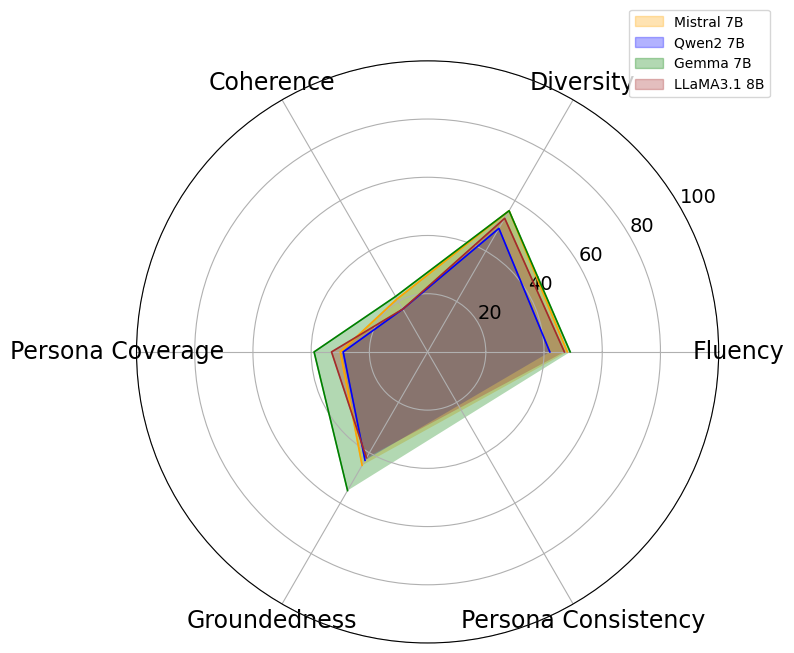

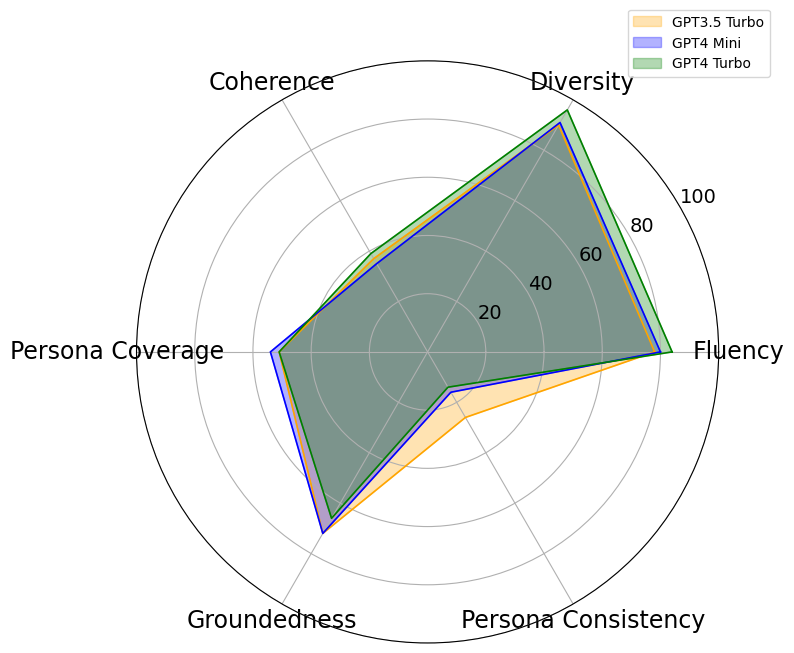

In [6]:
# Create radar chart for open-source LLMs in Vanilla setup
open_source_data_vanilla = [data_mistral7b_vanilla, data_qwen2_7b_vanilla, data_gemma_7b_vanilla ,data_llama13b_vanilla]
open_source_labels_vanilla = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B','LLaMA3.1 8B']
create_radar_chart(open_source_data_vanilla, open_source_labels_vanilla, categories, colors, "radar_vanilla_open_source.pdf")

# Create radar chart for closed-source LLMs in Vanilla setup
closed_source_data_vanilla = [data_gpt35_turbo_vanilla, data_gpt4_mini_vanilla, data_gpt4_turbo_vanilla]
closed_source_labels_vanilla = ['GPT3.5 Turbo', 'GPT4 Mini', 'GPT4 Turbo']
create_radar_chart(closed_source_data_vanilla, closed_source_labels_vanilla, categories, colors, "radar_vanilla_closed_source.pdf")


In [7]:
colors = ['red', 'grey', 'purple', 'maroon']

#Bert-f1, Dist-2, UE-Score, P-Dist, Nat-Ground, C Score

# Open-source LLMs  -   COT -    FoCus dataset (scaled by 100)
data_mistral7b_cot = [0.76 * 100,       0.88 * 100,     0.33 * 100,     0.53 * 100,     0.82 * 100,     0.41 * 100]
data_qwen2_7b_cot =  [0.62 * 100,       0.72 * 100,     0.36 * 100,     0.43 * 100,     0.70 * 100,     0.21 * 100]
data_gemma_7b_cot =  [0.72 * 100,       0.83 * 100,     0.26 * 100,     0.53 * 100,     0.81 * 100,     0.42 * 100]
data_llama13b_cot =  [0.80 * 100,       0.93 * 100,     0.33 * 100,     0.59 * 100,     0.89 * 100,     0.54 * 100]

# Closed-source LLMs  -   COT -    FoCus dataset (scaled by 100)
data_gpt35_turbo_cot = [0.80 * 100,     0.92 * 100,     0.41 * 100,     0.48 * 100,     0.81 * 100,     0.40 * 100]
data_gpt4_mini_cot =   [0.86 * 100,     0.99 * 100,     0.45 * 100,     0.57 * 100,     0.84 * 100,     0.30 * 100]
data_gpt4_turbo_cot =  [0.86 * 100,     0.98 * 100,     0.48 * 100,     0.52 * 100,     0.70 * 100,     0.21 * 100]


# Add the first value to each data set to close the radar chart
data_mistral7b_cot += data_mistral7b_cot[:1]
data_qwen2_7b_cot += data_qwen2_7b_cot[:1]
data_gemma_7b_cot += data_gemma_7b_cot[:1]
data_llama13b_cot += data_llama13b_cot[:1]

data_gpt35_turbo_cot += data_gpt35_turbo_cot[:1]
data_gpt4_mini_cot += data_gpt4_mini_cot[:1]
data_gpt4_turbo_cot += data_gpt4_turbo_cot[:1]

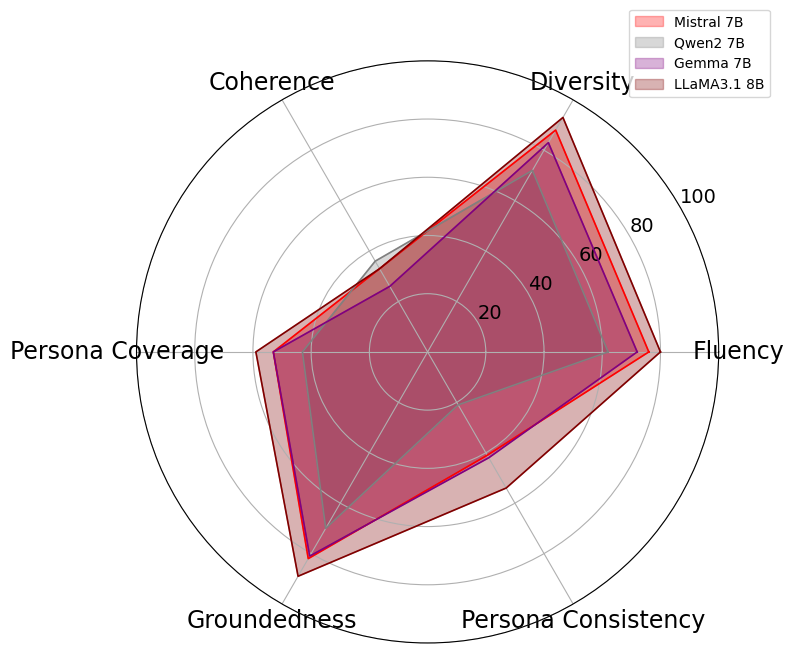

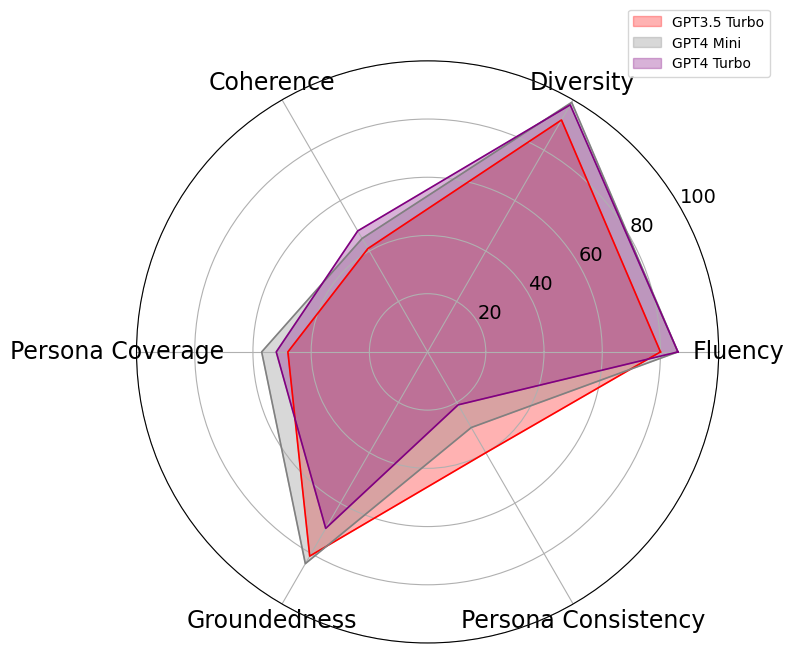

In [8]:
# Create radar chart for open-source LLMs in Vanilla setup
open_source_data_COT = [data_mistral7b_cot, data_qwen2_7b_cot, data_gemma_7b_cot, data_llama13b_cot]
open_source_labels_COT = ['Mistral 7B', 'Qwen2 7B', 'Gemma 7B', 'LLaMA3.1 8B']
create_radar_chart(open_source_data_COT, open_source_labels_COT, categories, colors, "radar_cot_open_source.pdf")

# Create radar chart for closed-source LLMs in Vanilla`` setup
closed_source_data_COT = [data_gpt35_turbo_cot, data_gpt4_mini_cot, data_gpt4_turbo_cot]
closed_source_labels_COT = ['GPT3.5 Turbo', 'GPT4 Mini', 'GPT4 Turbo']
create_radar_chart(closed_source_data_COT, closed_source_labels_COT, categories, colors, "radar_cot_closed_source.pdf")
